In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns



In [177]:
# Chargement des données
file_path = "D:\\MEMO\\dataset\\statlog+shuttle\\shuttle.tst"
data = pd.read_csv(file_path, delim_whitespace=True, header=None, engine='python')


C:\Users\elton\AppData\Local\Temp\ipykernel_32648\940385834.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, engine='python')


In [179]:
# Séparation des caractéristiques et de la cible
X = data.iloc[:, :-1]  # Colonnes 0 à 8
y = data.iloc[:, -1]   # Colonne 9


In [181]:
# Binarisation de la cible : classe 1 (normale) = 0, autres classes (anomalies) = 1
y_binary = (y != 1).astype(int)


In [183]:
# Standardisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [185]:
# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=0.95)  # Garder 95% de la variance
X_pca = pca.fit_transform(X_scaled)


In [187]:
# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_binary, test_size=0.2, random_state=42, stratify=y_binary)


In [189]:

# Modèle Isolation Forest avec GridSearchCV pour l'ajustement des hyperparamètres
param_grid = {
    'contamination': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'max_samples': ['auto', 0.8, 0.9]
}
iso_forest = IsolationForest(random_state=42, n_jobs=-1)
grid_search_iso = GridSearchCV(iso_forest, param_grid, scoring=make_scorer(f1_score, average='macro'), cv=3)
grid_search_iso.fit(X_train, y_train)
best_iso_forest = grid_search_iso.best_estimator_


In [191]:
# Prédictions : -1 pour anomalies, 1 pour normales (convertir en binaire)
y_pred_train = (best_iso_forest.predict(X_train) == -1).astype(int)
y_pred_test = (best_iso_forest.predict(X_test) == -1).astype(int)


In [193]:
# Fonction d'évaluation des modèles
def evaluate_model(y_true, y_pred, model_name):
    print(f"Rapport de classification pour {model_name}:\n")
    print(classification_report(y_true, y_pred))

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Normaux", "Anomalies"],
        yticklabels=["Normaux", "Anomalies"]
    )
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel("Prédiction")
    plt.ylabel("Vrai")
    plt.show()

    # Précision, rappel, F1-score
    metrics = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Precision": metrics["1"]["precision"],
        "Recall": metrics["1"]["recall"],
        "F1-Score": metrics["1"]["f1-score"],
        "Accuracy": metrics["accuracy"]
    }

Rapport de classification pour Isolation Forest:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2296
           1       0.73      0.04      0.08       604

    accuracy                           0.80      2900
   macro avg       0.76      0.52      0.48      2900
weighted avg       0.78      0.80      0.72      2900



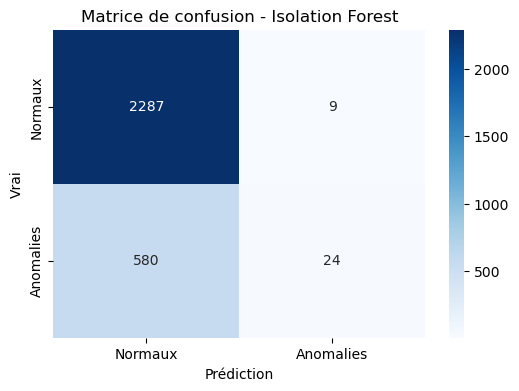

Metrics: {'Precision': 0.7272727272727273, 'Recall': 0.039735099337748346, 'F1-Score': 0.07535321821036106, 'Accuracy': 0.796896551724138}


In [195]:

# Évaluation sur les données de test
metrics = evaluate_model(y_test, y_pred_test, "Isolation Forest")
print("Metrics:", metrics)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Chargement des données
file_path = "D:\MEMO\dataset\statlog+shuttle\shuttle.tst"
data = pd.read_csv(file_path, delim_whitespace=True, header=None, engine='python')


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\elton\AppData\Local\Temp\ipykernel_12124\778972402.py:2: SyntaxWarning: invalid escape sequence '\M'
  file_path = "D:\MEMO\dataset\statlog+shuttle\shuttle.tst"
C:\Users\elton\AppData\Local\Temp\ipykernel_12124\778972402.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, engine='python')


In [7]:
# Séparation des caractéristiques et de la cible
X = data.iloc[:, :-1]  # Colonnes 0 à 8
y = data.iloc[:, -1]   # Colonne 9


In [9]:
# Binarisation de la cible : classe 1 (normale) = 0, autres classes (anomalies) = 1
y_binary = (y != 1).astype(int)



In [11]:
# Standardisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=0.95)  # Garder 95% de la variance
X_pca = pca.fit_transform(X_scaled)


In [15]:

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_binary, test_size=0.2, random_state=42, stratify=y_binary)


In [17]:
# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [19]:

# Modèle Random Forest avec GridSearchCV pour l'ajustement des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid, scoring='f1', cv=3)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_classifier = grid_search_rf.best_estimator_


In [21]:

# Prédictions sur l'ensemble de test
y_pred_test = best_rf_classifier.predict(X_test)



In [23]:
# Fonction d'évaluation des modèles
def evaluate_model(y_true, y_pred, model_name):
    print(f"Rapport de classification pour {model_name}:\n")
    print(classification_report(y_true, y_pred))

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Normaux", "Anomalies"],
        yticklabels=["Normaux", "Anomalies"]
    )
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel("Prédiction")
    plt.ylabel("Vrai")
    plt.show()

    # Précision, rappel, F1-score
    metrics = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Precision": metrics["1"]["precision"],
        "Recall": metrics["1"]["recall"],
        "F1-Score": metrics["1"]["f1-score"],
        "Accuracy": metrics["accuracy"]
    }


Rapport de classification pour Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       1.00      1.00      1.00       604

    accuracy                           1.00      2900
   macro avg       1.00      1.00      1.00      2900
weighted avg       1.00      1.00      1.00      2900



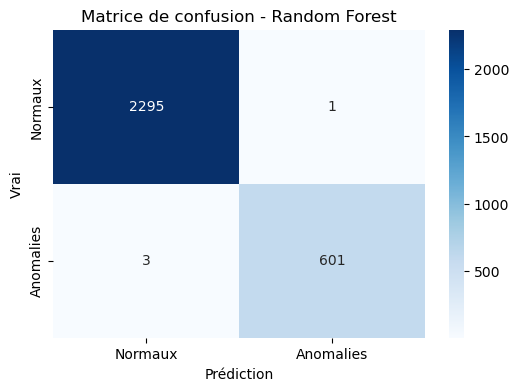

In [25]:

# Évaluation sur les données de test
metrics = evaluate_model(y_test, y_pred_test, "Random Forest")

In [43]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
# Rééchantillonnage pour gérer le déséquilibre
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [47]:
# Modèle Random Forest avec GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='f1_weighted')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search_rf.best_estimator_



In [49]:
# Prédictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)


In [51]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Normaux", "Anomalies"],  # Ajuste selon tes labels
        yticklabels=["Normaux", "Anomalies"]
    )
    plt.title(f"Matrice de Confusion - {model_name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Valeurs Réelles")
    plt.show()

Évaluation pour Random Forest :
Précision : 1.00
Rappel : 1.00
F1-Score : 1.00
Accuracy : 1.00


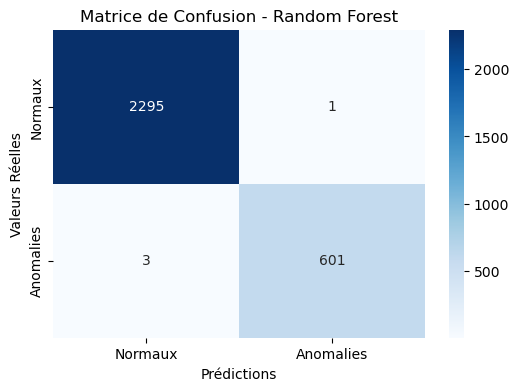

Metrics (Random Forest): {'Precision': 0.9983388704318937, 'Recall': 0.9950331125827815, 'F1-Score': 0.9966832504145937, 'Accuracy': 0.9986206896551724}


In [53]:
# Évaluation
def evaluate_classification(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Évaluation pour {model_name} :")
    print(f"Précision : {precision:.2f}")
    print(f"Rappel : {recall:.2f}")
    print(f"F1-Score : {f1:.2f}")
    print(f"Accuracy : {accuracy:.2f}")
    
    # Affichage de la matrice de confusion
    plot_confusion_matrix(y_true, y_pred, model_name)
    
    return {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy
    }

metrics_rf = evaluate_classification(y_test, y_pred_test_rf, "Random Forest")
print("Metrics (Random Forest):", metrics_rf)


In [55]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# Modèle Local Outlier Factor
lof_model = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof_model.fit(X_train)


LocalOutlierFactor(novelty=True)

In [59]:
# Prédictions
y_pred_train_lof = (lof_model.predict(X_train) == -1).astype(int)  # LOF retourne -1 pour anomalies
y_pred_test_lof = (lof_model.predict(X_test) == -1).astype(int)


In [61]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Normaux", "Anomalies"],  # Ajuste selon tes labels
        yticklabels=["Normaux", "Anomalies"]
    )
    plt.title(f"Matrice de Confusion - {model_name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Valeurs Réelles")
    plt.show()


Évaluation pour Local Outlier Factor :
Précision : 0.38
Rappel : 0.09
F1-Score : 0.14
Accuracy : 0.78


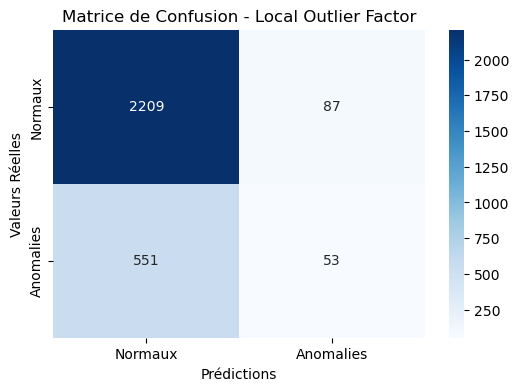

Metrics (Local Outlier Factor): {'Precision': 0.37857142857142856, 'Recall': 0.08774834437086093, 'F1-Score': 0.1424731182795699, 'Accuracy': 0.78}


In [63]:
# Évaluation
def evaluate_classification(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Évaluation pour {model_name} :")
    print(f"Précision : {precision:.2f}")
    print(f"Rappel : {recall:.2f}")
    print(f"F1-Score : {f1:.2f}")
    print(f"Accuracy : {accuracy:.2f}")
    
    # Affichage de la matrice de confusion
    plot_confusion_matrix(y_true, y_pred, model_name)
    
    return {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy
    }

metrics_lof = evaluate_classification(y_test, y_pred_test_lof, "Local Outlier Factor")
print("Metrics (Local Outlier Factor):", metrics_lof)


Évaluation pour PCA Robuste + Isolation Forest :
Précision : 0.71
Rappel : 0.34
F1-Score : 0.46
Accuracy : 0.83


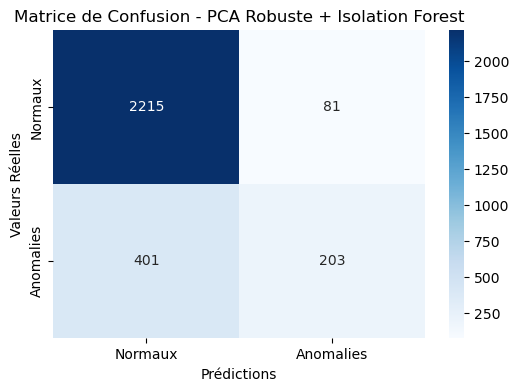

Metrics (PCA Robuste + Isolation Forest): {'Precision': 0.7147887323943662, 'Recall': 0.3360927152317881, 'F1-Score': 0.4572072072072072, 'Accuracy': 0.8337931034482758}


In [65]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Application de PCA robuste (remplace Isolation Forest si nécessaire)
pca_robust = PCA(n_components=2)  # Réduit à 2 dimensions pour visualisation si nécessaire
X_train_pca = pca_robust.fit_transform(X_train)
X_test_pca = pca_robust.transform(X_test)

# Utilisation d'Isolation Forest pour détecter les anomalies sur les données PCA
iso_forest_pca = IsolationForest(random_state=42, contamination=0.1)
iso_forest_pca.fit(X_train_pca)

# Prédictions
y_pred_train_pca = (iso_forest_pca.predict(X_train_pca) == -1).astype(int)
y_pred_test_pca = (iso_forest_pca.predict(X_test_pca) == -1).astype(int)

# Évaluation avec matrice de confusion
metrics_pca = evaluate_classification(y_test, y_pred_test_pca, "PCA Robuste + Isolation Forest")
print("Metrics (PCA Robuste + Isolation Forest):", metrics_pca)


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 1. Data Loading and Preprocessing
file_path = "D:\\MEMO\\dataset\\archive\\kddcup.data_10_percent.gz"
# ... (Data loading and preprocessing code from previous response) ...
# Load the dataset 
data = pd.read_csv(file_path, header=None)

# Assign column names (based on the KDD Cup 99 documentation)
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
    "num_failed_logins", "logged_in", "num_compromised", "root_shell",
    "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "attack_type"
]
data.columns = column_names

# Convert categorical features to numerical using one-hot encoding
categorical_features = ["protocol_type", "service", "flag"]
data = pd.get_dummies(data, columns=categorical_features)

# 2. Data Splitting and Standardization
# ... (Data splitting and standardization code from previous response) ...

# Separate features (X) and target (y)
X = data.drop("attack_type", axis=1)
y = data["attack_type"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. Resampling using SMOTE (Oversampling) - Adjusted
smote = SMOTE(random_state=42, k_neighbors=2)  # Change k_neighbors to 2 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
